In [282]:
import time
import requests
from dotenv import load_dotenv
import os 
import pandas as pd
import numpy as np
import alpaca_trade_api as tradeapi
import json
import matplotlib.pyplot as plt
from pathlib import Path

load_dotenv()

True

In [283]:
import plotly.express as px
import seaborn as sns

In [284]:
crypto_api_key = os.getenv("crypto_key")

In [285]:
type(crypto_api_key)

str

In [286]:
btc = "https://min-api.cryptocompare.com/data/v2/histoday?fsym=BTC&tsym=USD&limit=100&api_key={crypto_api_key}"

In [287]:
response_btc = requests.get(btc).json()
btc_dict = response_btc["Data"]

In [288]:
columns_btc = ["Data", "Value"]
rows_btc = []

In [289]:
for entries in btc_dict["Data"]:
    epoch = entries["time"]
    date = time.strftime("%m/%d/%Y", time.localtime(epoch))
    closing_price = entries["close"]
    rows_btc.append((date,closing_price))

In [290]:
bitcoin_prices = pd.DataFrame(rows_btc, columns=["Date", "Bitcoin"])

In [291]:
eth = "https://min-api.cryptocompare.com/data/v2/histoday?fsym=ETH&tsym=USD&limit=100&api_key={crypto_api_key}"

columns_eth = ["Data", "Value"]
rows_eth = []

response_eth = requests.get(eth).json()
eth_dict = response_eth["Data"]

for entries in eth_dict["Data"]:
    epoch = entries["time"]
    date = time.strftime("%m/%d/%Y", time.localtime(epoch))
    closing_price = entries["close"]
    rows_eth.append((date,closing_price))

ethereum_prices = pd.DataFrame(rows_eth, columns=["Date", "Ethereum"])

In [292]:
ada = "https://min-api.cryptocompare.com/data/v2/histoday?fsym=ADA&tsym=USD&limit=100&api_key={crypto_api_key}"

columns_ada = ["Data", "Value"]
rows_ada = []

response_ada = requests.get(ada).json()
ada_dict = response_ada["Data"]

for entries in ada_dict["Data"]:
    epoch = entries["time"]
    date = time.strftime("%m/%d/%Y", time.localtime(epoch))
    closing_price = entries["close"]
    rows_ada.append((date,closing_price))

cardano_prices = pd.DataFrame(rows_ada, columns=["Date", "Cardano"])

In [293]:
xrp = "https://min-api.cryptocompare.com/data/v2/histoday?fsym=XRP&tsym=USD&limit=100&api_key={crypto_api_key}"

columns_xrp = ["Data", "Value"]
rows_xrp = []

response_xrp = requests.get(xrp).json()
xrp_dict = response_xrp["Data"]

for entries in xrp_dict["Data"]:
    epoch = entries["time"]
    date = time.strftime("%m/%d/%Y", time.localtime(epoch))
    closing_price = entries["close"]
    rows_xrp.append((date,closing_price))

ripple_prices = pd.DataFrame(rows_xrp, columns=["Date", "Ripple"])

In [294]:
sc = "https://min-api.cryptocompare.com/data/v2/histoday?fsym=SC&tsym=USD&limit=100&api_key={crypto_api_key}"

columns_sc = ["Data", "Value"]
rows_sc = []

response_sc = requests.get(sc).json()
sc_dict = response_sc["Data"]

for entries in sc_dict["Data"]:
    epoch = entries["time"]
    date = time.strftime("%m/%d/%Y", time.localtime(epoch))
    closing_price = entries["close"]
    rows_sc.append((date,closing_price))

siaCoin_prices = pd.DataFrame(rows_sc, columns=["Date", "SiaCoin"])

In [295]:
prices_concat = pd.concat([bitcoin_prices, ethereum_prices, cardano_prices, ripple_prices, siaCoin_prices], axis=1)
prices = prices_concat.loc[:,~prices_concat.columns.duplicated()]

In [296]:
prices_df = prices.set_index("Date")

In [297]:
prices_df.head(-1)

,Bitcoin,Ethereum,Cardano,Ripple,SiaCoin
Date,,,,,
02/11/2021,47435.54,1844.84,0.9273,0.6102,0.01319
02/12/2021,47222.32,1817.48,0.9137,0.6336,0.01370
02/13/2021,48652.87,1802.96,0.8450,0.5931,0.01276
02/14/2021,47936.51,1779.40,0.8605,0.5502,0.01180
02/15/2021,49184.63,1782.83,0.8712,0.5200,0.01150
...,...,...,...,...,...
05/17/2021,42886.02,3377.65,2.0060,1.5920,0.02693
05/18/2021,36771.87,2442.89,1.4710,1.0620,0.01735
05/19/2021,40597.40,2772.84,1.8020,1.1810,0.02034


In [300]:
daily_change = prices_df.pct_change().dropna()

fig = px.line(daily_change, title="100 Day Change", width=800, height=600)
fig.show()

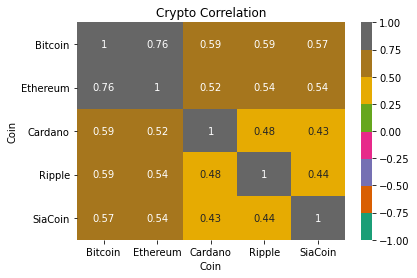

In [299]:
correlation = daily_change.corr()

def correlation_map(dataframe):
    corr_plot = sns.heatmap(dataframe, vmin = -1, vmax = 1, cmap = "Dark2", annot= True)
    corr_plot.set(
    xlabel = "Coin", 
    ylabel = "Coin",
    title = "Crypto Correlation")

correlation_map(correlation)